In [2]:
from pathlib import Path
from torch.utils.data import DataLoader
from Dataset import MyDataset
from Trainer import Trainer
import os
import seaborn as sns
import umap
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "2"
model_path = Path("/") / "thunderdisk" / "data_rene_policistico_log" / "2021-08-03 09:00:30" / "40.pth"
trainer = Trainer(model_path, feature_extraction=True)
features_t, labels_t = trainer.extract_features(trainer.train_dl)
features_v, labels_v = trainer.extract_features(trainer.valid_dl)

Using pre-trained weights
Dataset train of 9896 images loaded
Dataset validation of 2519 images loaded


  0%|          | 0/155 [00:00<?, ?it/s]/home/utente/rene-policistico/log/.venv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 40/40 [00:31<00:00,  1.26it/s]


In [3]:
umap_t = umap.UMAP().fit_transform(features_t)
print(features_t.shape, "->", umap_t.shape)
umap_v = umap.UMAP().fit_transform(features_v)
print(features_v.shape, "->", umap_v.shape)

/home/utente/rene-policistico/log/.venv/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(9896, 32768) -> (9896, 2)
(2519, 32768) -> (2519, 2)


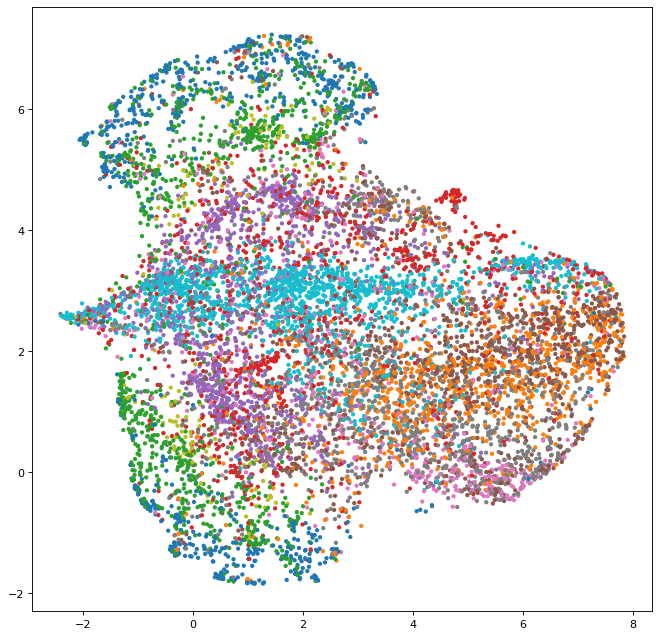

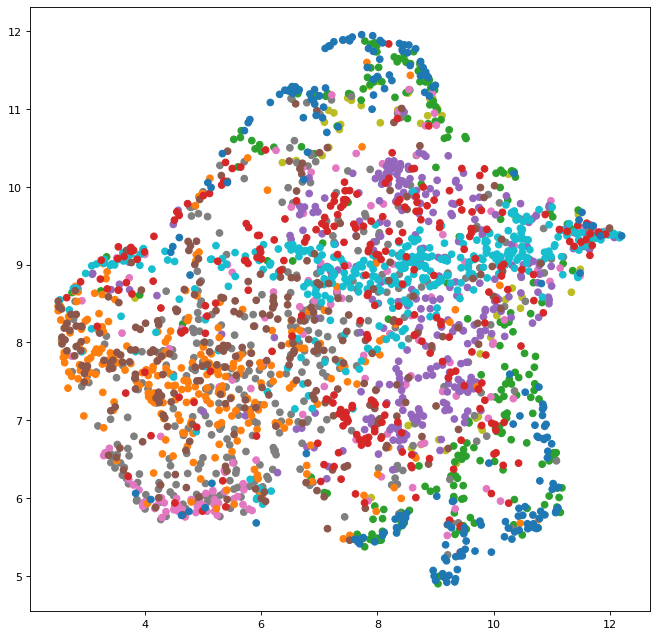

In [26]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(
    umap_t[:, 0],
    umap_t[:, 1],
    c=[
        sns.color_palette()[x]
        for x in labels_t
    ],s=8
)
plt.show()
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(
    umap_v[:, 0],
    umap_v[:, 1],
    c=[
        sns.color_palette()[x]
        for x in labels_v
    ],s=35
)